In [40]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [41]:
import pandas as pd

df = pd.read_csv('/content/Insurance.csv')
df.head()

,Age,Policy Term,PPT,Amount,Plan
0,33,20,10,30000,Nonpar
1,27,20,10,25000,Nonpar
2,36,20,10,30000,Nonpar
3,36,20,20,2000,Health
4,43,20,5,25000,Nonpar


In [42]:
df.isna().sum()

Age            0
Policy Term    0
PPT            0
Amount         0
Plan           0
dtype: int64

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Age          100 non-null    int64 
 1   Policy Term  100 non-null    int64 
 2   PPT          100 non-null    int64 
 3   Amount       100 non-null    int64 
 4   Plan         100 non-null    object
dtypes: int64(4), object(1)
memory usage: 4.0+ KB


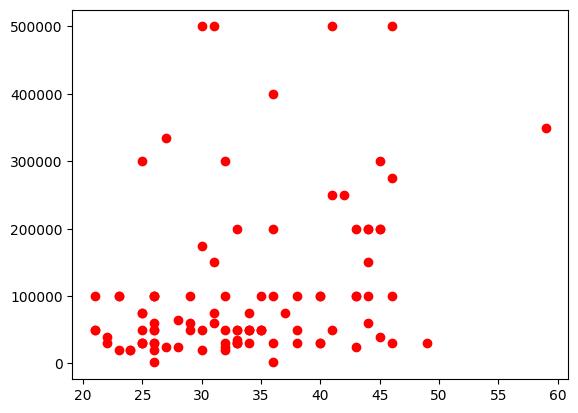

In [44]:
plt.scatter(df.Age,df.Amount,color='red')

array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Policy Term'}>],
       [<Axes: title={'center': 'PPT'}>,
        <Axes: title={'center': 'Amount'}>]], dtype=object)

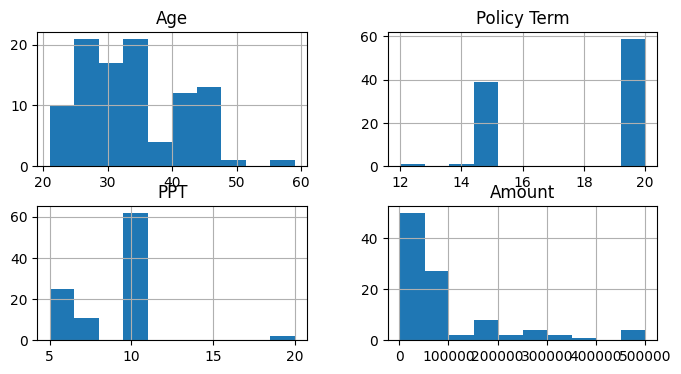

In [45]:
df.hist(figsize=(8,4))

In [46]:
#Seperate X and Y
X = df[['Age']]
y = df.Amount

In [47]:
X[:5]

,Age
0,33
1,27
2,36
3,36
4,43


In [48]:
y[:5]

0    30000
1    25000
2    30000
3     2000
4    25000
Name: Amount, dtype: int64

In [49]:
#Train the model

from sklearn.linear_model import LinearRegression

In [50]:
model = LinearRegression()

In [51]:
model

LinearRegression()

In [91]:
model.fit(X_train,y_train)

LinearRegression()

In [92]:
model.score(X_train,y_train)*100

12.147916890075338

In [85]:
df.shape

(100, 5)

In [86]:
100*.8 #Training


80.0

In [90]:
100*.2 #Testing

20.0

In [54]:
#Testing

from sklearn.model_selection import train_test_split

In [55]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,train_size=.8)

In [88]:
len(X_train)+len(X_test)

100

In [89]:
len(y_train)+len(y_test)

100

In [56]:
X_train[:5]

,Age
87,34
40,45
4,43
57,24
20,30


In [57]:
X_test[:5]

,Age
92,44
97,26
13,43
75,32
69,33


In [58]:
y_train[:5]

87     30000
40    200000
4      25000
57     20000
20     20000
Name: Amount, dtype: int64

In [59]:
y_test[:5]

92    200000
97     20000
13    100000
75    300000
69     30000
Name: Amount, dtype: int64

In [70]:
y_pred = model.predict(X_test)
y_pred[:5]

array([159450.65135054,  70597.74983806, 154514.37904429, 100215.38367555,
       105151.6559818 ])

In [71]:
y_test[:5]

92    200000
97     20000
13    100000
75    300000
69     30000
Name: Amount, dtype: int64

In [63]:
# check model performance using accuracy metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [64]:
mean_absolute_error(y_test,y_pred)

73635.60297470442

In [65]:
mean_squared_error(y_test,y_pred)

12679416511.58071

In [83]:
r2_score(y_test,y_pred)

0.027484304302451745

In [84]:
print(f"MSE:  {mean_squared_error(y_test,y_pred)}")
print(f"MAE:  {mean_absolute_error(y_test,y_pred)}")
print(f"R2_Sqaure :  {r2_score(y_test,y_pred)}")

MSE:  12679416511.58071
MAE:  73635.60297470442
R2_Sqaure :  0.027484304302451745


<Axes: >

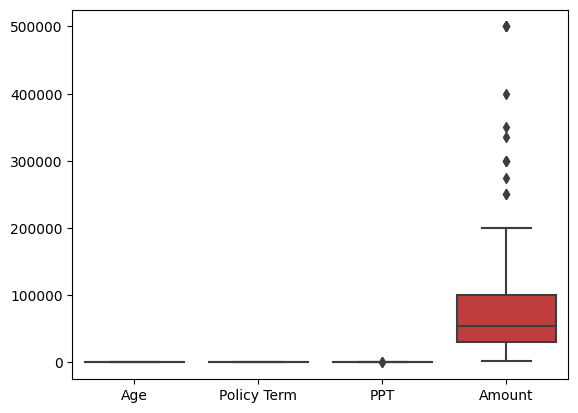

In [67]:
# check do we have outliers
sns.boxplot(data=df)

Text(0.5, 1.0, 'Age vs Actual Amount')

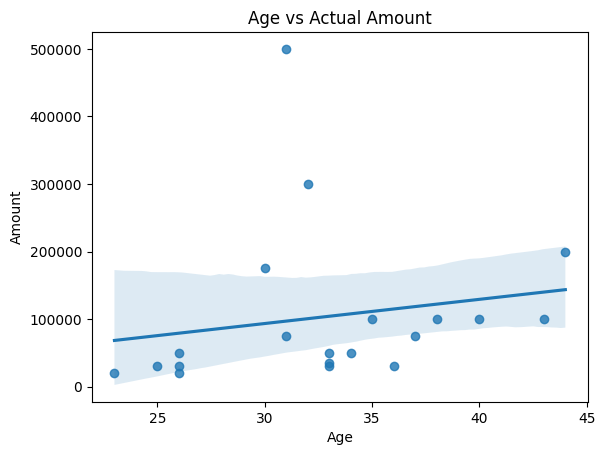

In [94]:
sns.regplot(x=X_test,y=y_test)
plt.title("Age vs Actual Amount")

Text(0.5, 1.0, 'Age vs Predicted Amount')

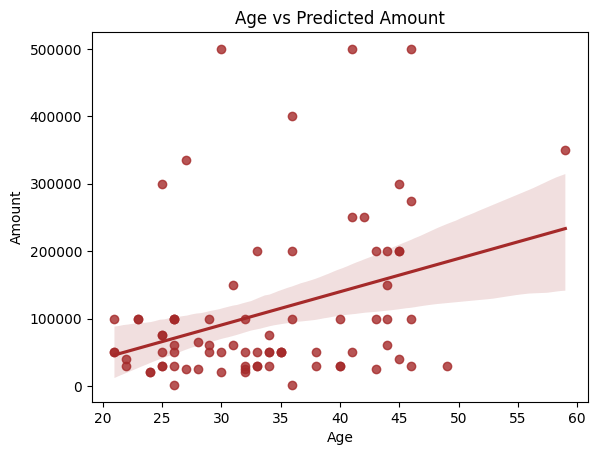

In [95]:
sns.regplot(x=X_train,y=y_train,data=df,color='Brown')
plt.title("Age vs Predicted Amount")